In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [54]:
# import data
df = pd.read_csv('../data/synthetic_sales_data.csv')
df['TIME_STEP'] = pd.to_datetime(df.TIME_STEP)

In [55]:
# describe data statistics
print(df.describe())

                        TIME_STEP  UNITS_SOLD  GlanceViews         SOA  \
count                        1000  1000.00000  1000.000000  797.000000   
mean   2022-01-11 09:48:57.600000    37.10400   171.494000   23.879955   
min           2020-01-01 00:00:00     7.00000    79.000000    0.012147   
25%           2020-12-29 12:00:00    24.00000   115.000000   12.075311   
50%           2022-01-23 00:00:00    34.00000   165.500000   23.458875   
75%           2023-01-20 12:00:00    48.00000   220.000000   35.205218   
max           2023-12-30 00:00:00   104.00000   320.000000   49.945235   
std                           NaN    16.17711    58.431363   13.870182   

       PEAK_EVENT_FLAG  NET_INVOICE  keepa_price  OrderedAmount  
count      1000.000000  1000.000000  1000.000000    1000.000000  
mean          0.507000   104.067765    52.301203    1930.510301  
min           0.000000    10.045766     5.014986      66.268879  
25%           0.000000    56.054435    28.180700     855.625337  
50%

In [56]:
# Check for missing values
print(df.isnull().sum())

ITEM_ID              0
TIME_STEP            0
ASIN                 0
UNITS_SOLD           0
GlanceViews          0
Business_Unit        0
DEAL_TYPE          266
SOA                203
EVENT                0
PEAK_EVENT_FLAG      0
NET_INVOICE          0
CountryCd            0
keepa_price          0
CTN                  0
EVENT_TYPE           0
OrderedAmount        0
dtype: int64


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ITEM_ID          1000 non-null   object        
 1   TIME_STEP        1000 non-null   datetime64[ns]
 2   ASIN             1000 non-null   object        
 3   UNITS_SOLD       1000 non-null   int64         
 4   GlanceViews      1000 non-null   int64         
 5   Business_Unit    1000 non-null   object        
 6   DEAL_TYPE        734 non-null    object        
 7   SOA              797 non-null    float64       
 8   EVENT            1000 non-null   object        
 9   PEAK_EVENT_FLAG  1000 non-null   int64         
 10  NET_INVOICE      1000 non-null   float64       
 11  CountryCd        1000 non-null   object        
 12  keepa_price      1000 non-null   float64       
 13  CTN              1000 non-null   object        
 14  EVENT_TYPE       1000 non-null   object  

In [58]:
# Descriptive statistics
print(df.describe())
print(df['DEAL_TYPE'].value_counts())


                        TIME_STEP  UNITS_SOLD  GlanceViews         SOA  \
count                        1000  1000.00000  1000.000000  797.000000   
mean   2022-01-11 09:48:57.600000    37.10400   171.494000   23.879955   
min           2020-01-01 00:00:00     7.00000    79.000000    0.012147   
25%           2020-12-29 12:00:00    24.00000   115.000000   12.075311   
50%           2022-01-23 00:00:00    34.00000   165.500000   23.458875   
75%           2023-01-20 12:00:00    48.00000   220.000000   35.205218   
max           2023-12-30 00:00:00   104.00000   320.000000   49.945235   
std                           NaN    16.17711    58.431363   13.870182   

       PEAK_EVENT_FLAG  NET_INVOICE  keepa_price  OrderedAmount  
count      1000.000000  1000.000000  1000.000000    1000.000000  
mean          0.507000   104.067765    52.301203    1930.510301  
min           0.000000    10.045766     5.014986      66.268879  
25%           0.000000    56.054435    28.180700     855.625337  
50%

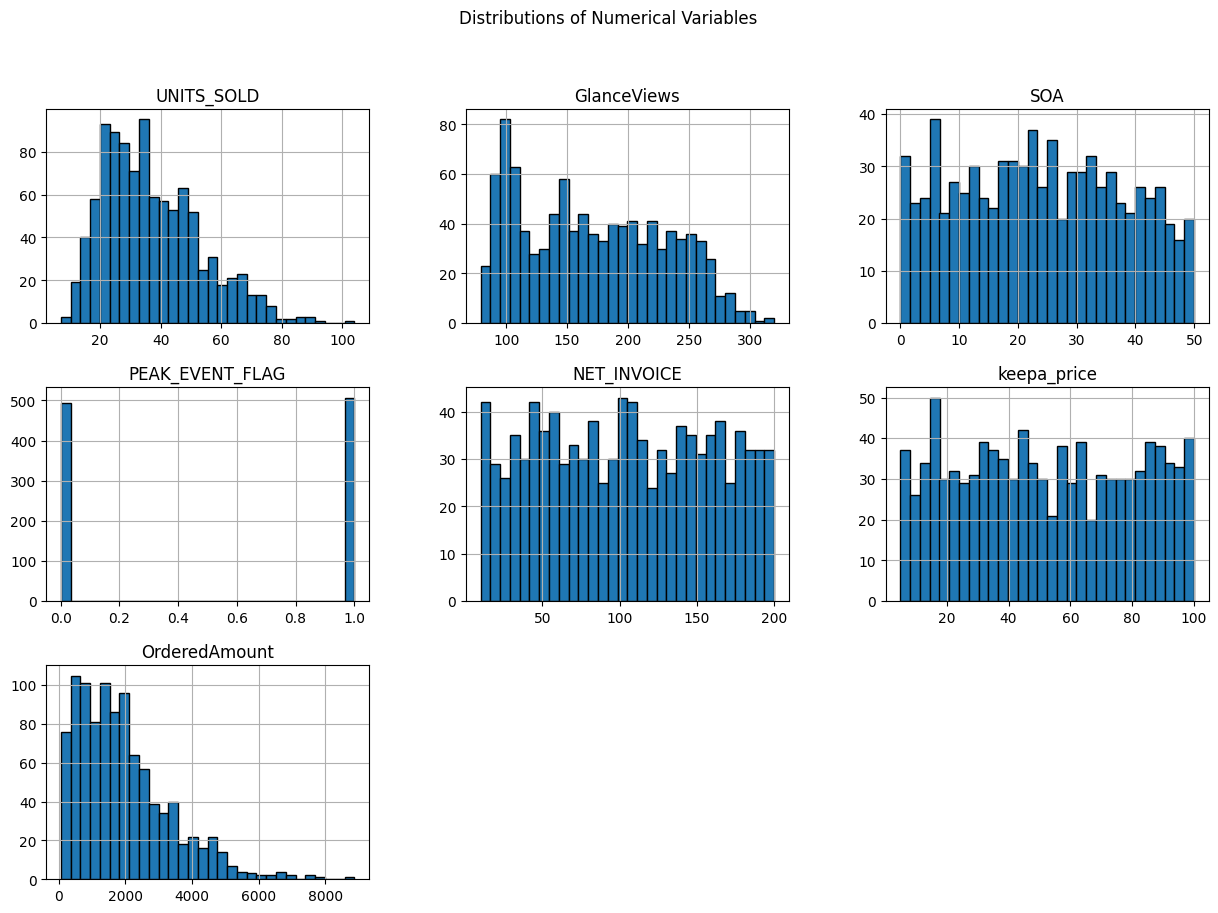

In [59]:
# Plot distributions of numerical variables
numerical_columns = df.select_dtypes(exclude=['object', 'datetime64[ns]']).columns
df[numerical_columns].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distributions of Numerical Variables')
plt.show()

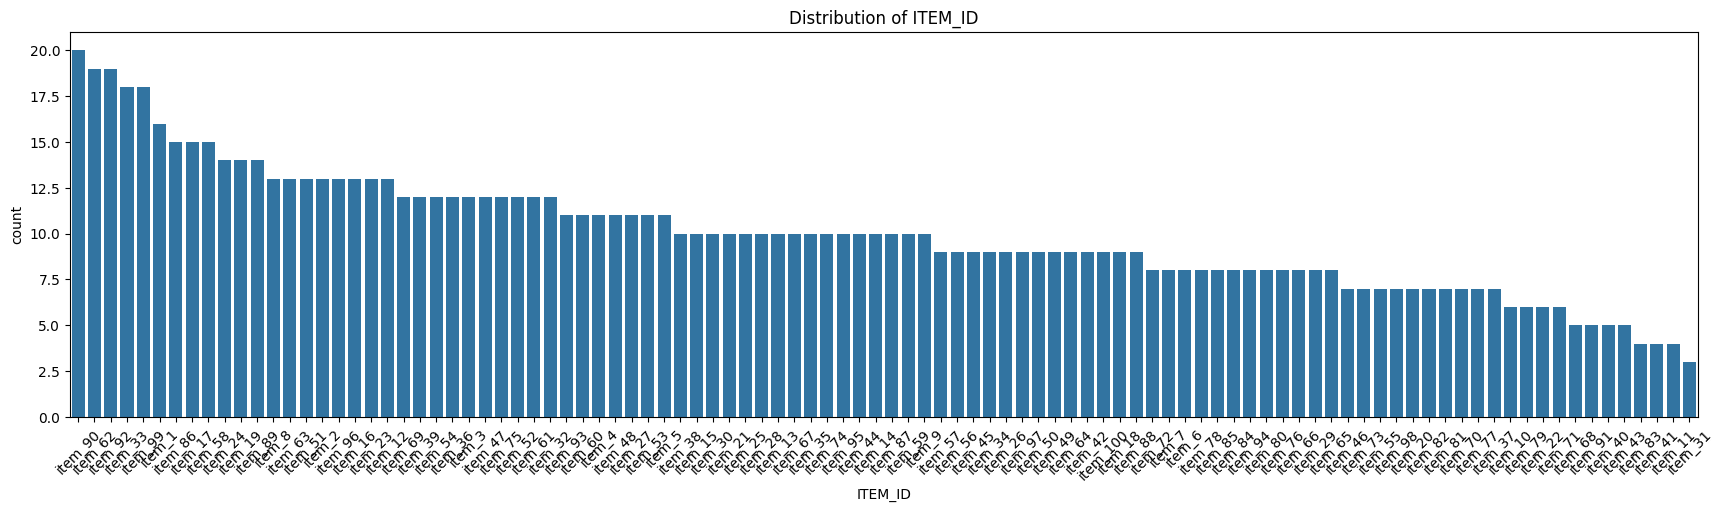

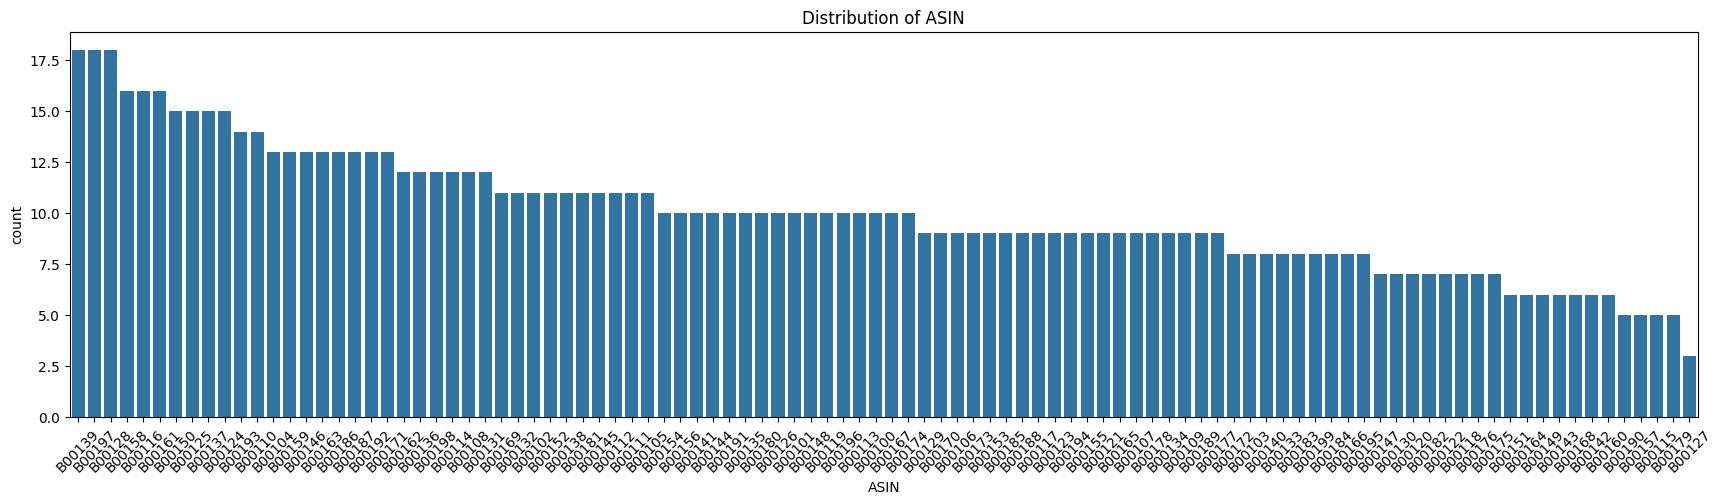

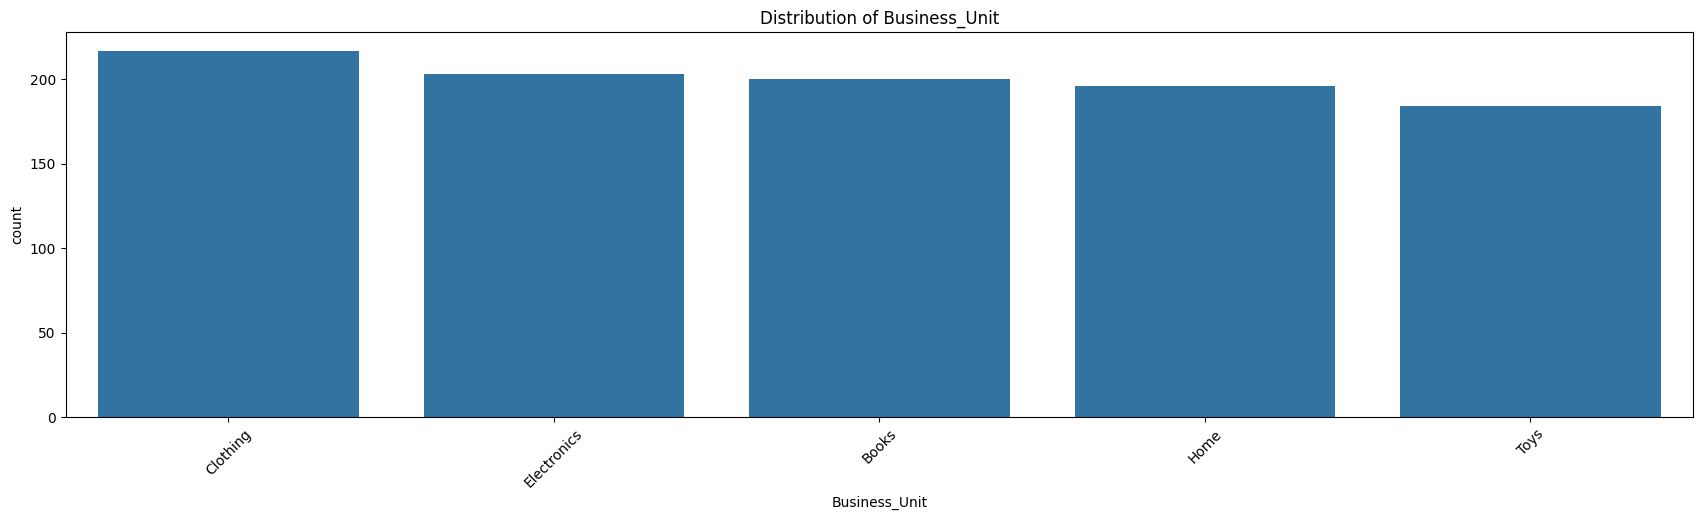

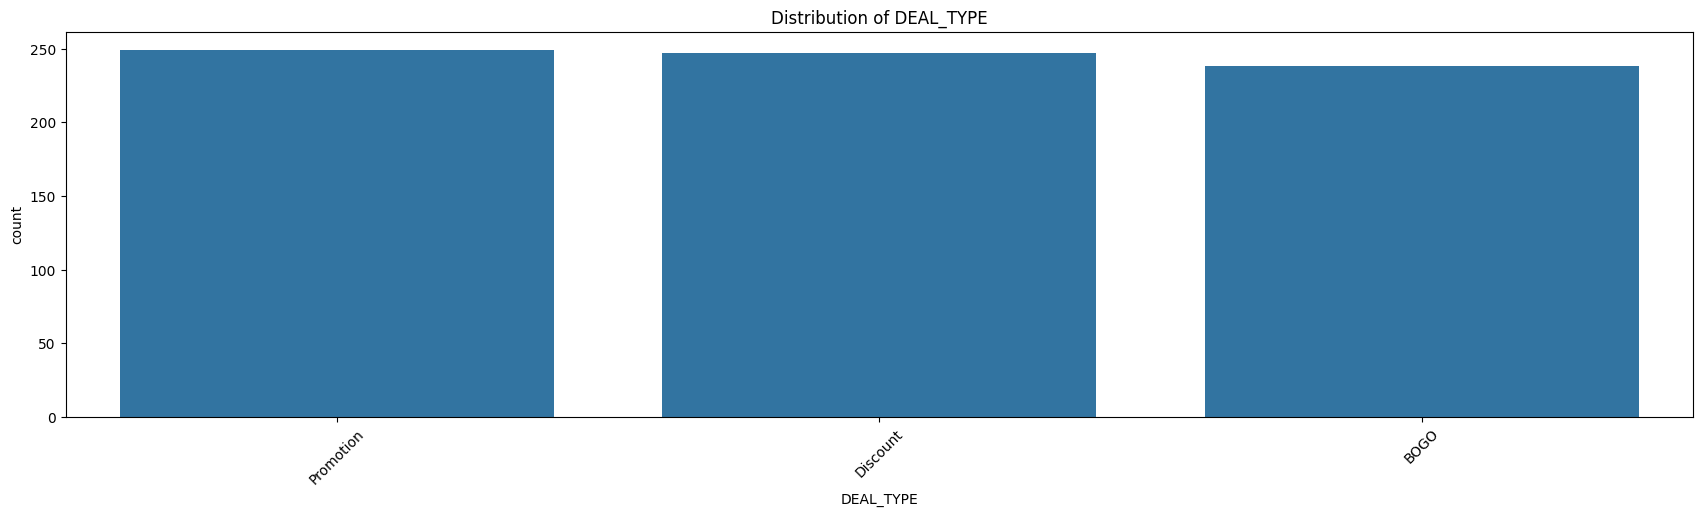

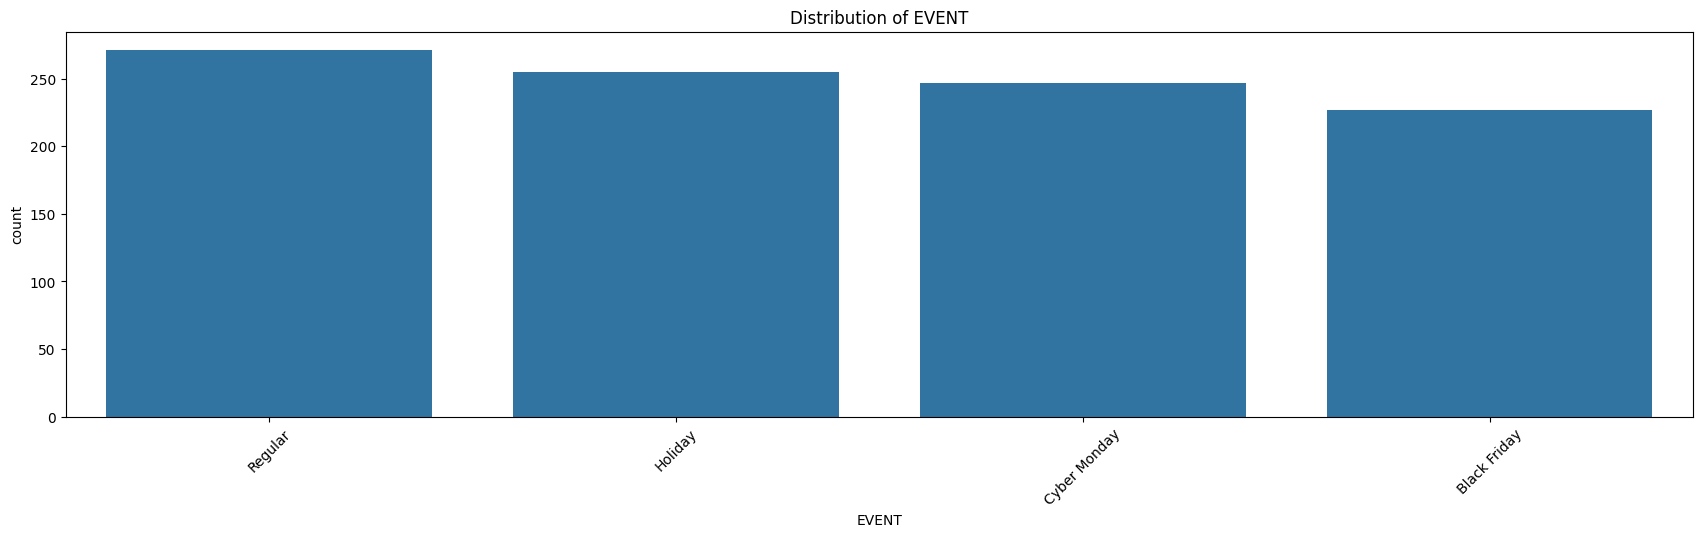

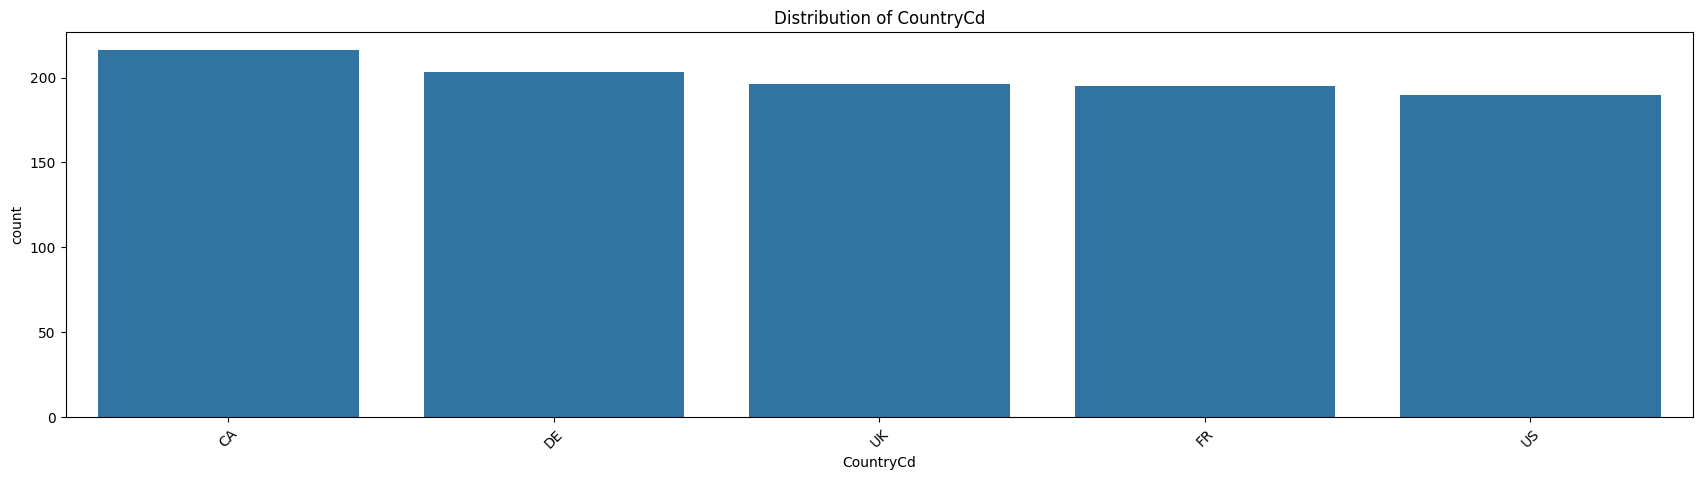

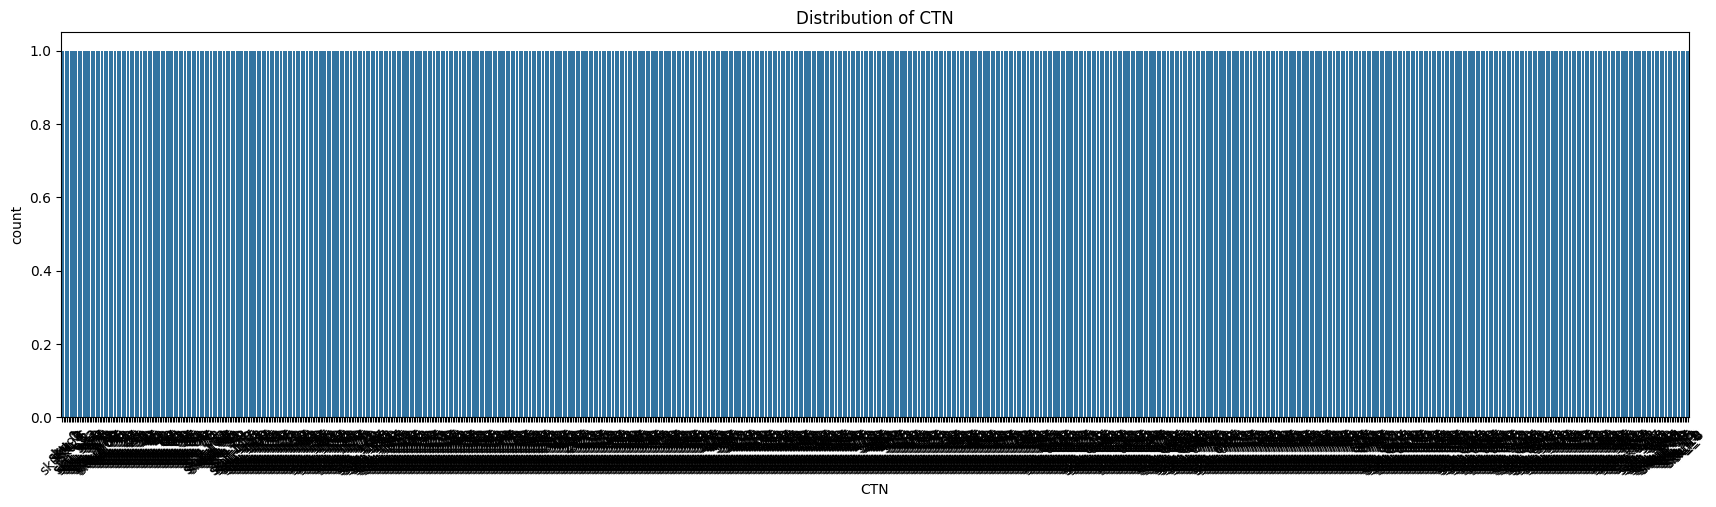

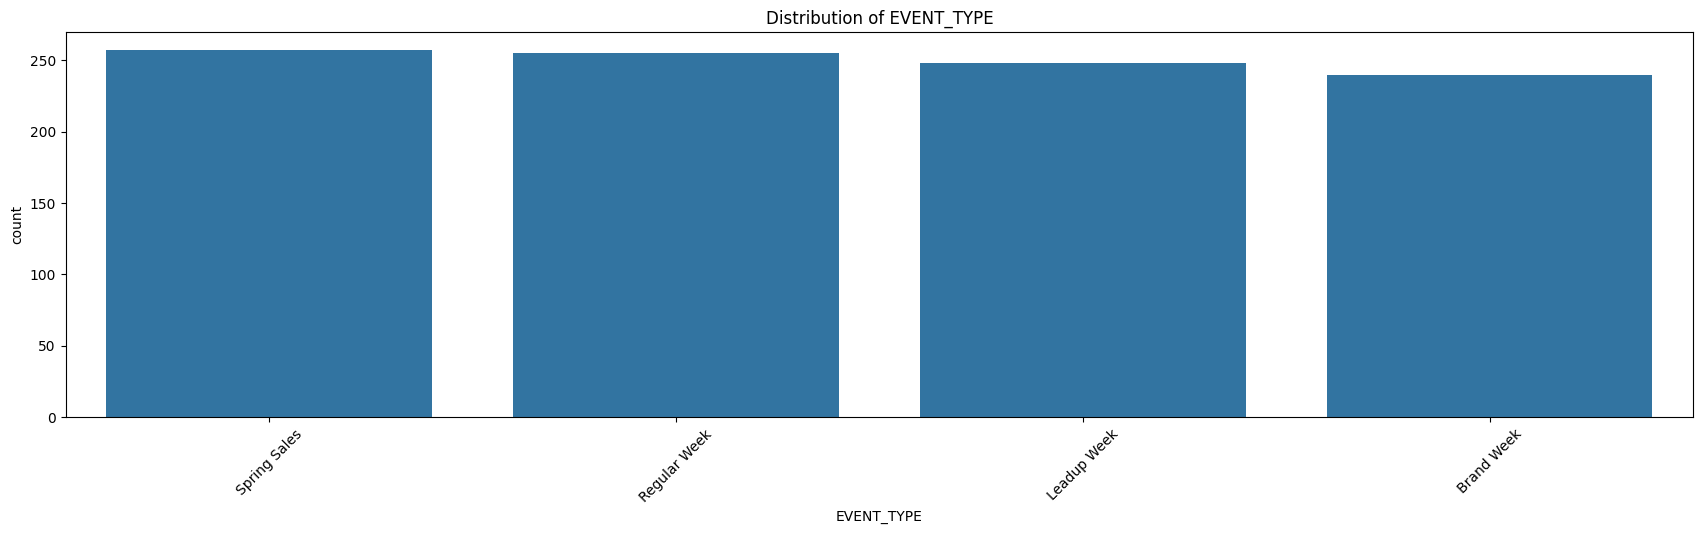

In [60]:
# Plot distributions of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(21, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

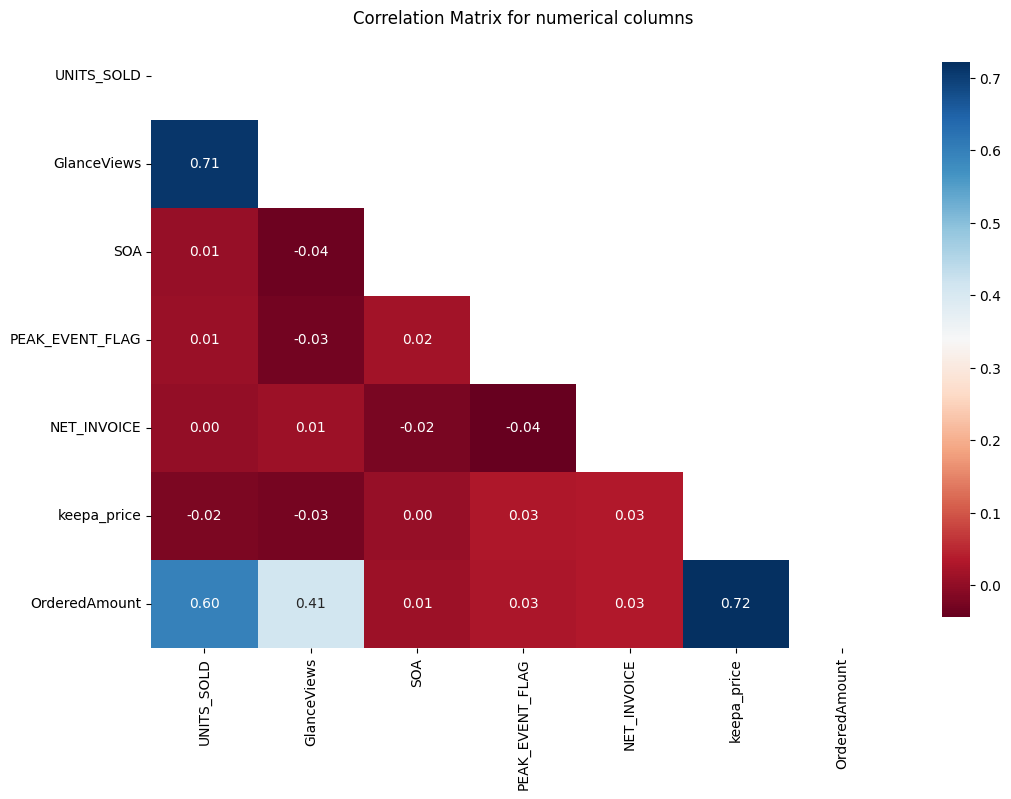

In [61]:
# Assuming 'df' is your DataFrame and 'numerical_columns' is defined
corr_matrix = df[numerical_columns].corr()

# Create a mask to display only the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
# Apply the mask by setting the 'mask' parameter
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap='RdBu',cbar_kws={"shrink": .9})
plt.title('Correlation Matrix for numerical columns')
plt.show()